# Introduction

In this notebook, we'll be visualizing the deaths of characters in the series based on genders

### Step 1 : Importing the necessary libraries and dependencies

In [23]:
# Step 1: Import dependencies
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

### Step 2 : Load the dataset into a dataframe

Go to the Kaggle page to download the dataset (https://www.kaggle.com/mylesoneill/game-of-thrones)

In [ ]:
deaths = pd.read_csv("/game-of-thrones/character-deaths.csv")

### Just some random insight

Can you believe George R. R. Martin has killed almost 1/3rd of the characters in GoT?

In [48]:
print("There are a total of {} characters and {} deaths. Percentage of Deaths : {}%".format(len(deaths), len(deaths.dropna()), len(deaths.dropna())/len(deaths) * 100))

There are a total of 917 characters and 292 deaths. Percentage of Deaths : 31.842966194111234%


### Step 3 : Cleaning the data for visualization

In [24]:
label_data = deaths["Gender"]
deaths_data = deaths.drop(deaths.columns[[0, 2, 3, 4, 5, 6]], axis=1).fillna("Nan")

### Step 4 : Create feature vectors

In [29]:
labelEncoder = LabelEncoder()
for col in deaths_data.columns.values:
    if deaths_data[col].dtypes == "object":
        unique_labels = np.unique(deaths_data[col])
        labelEncoder.fit(unique_labels)
        deaths_data[col] = labelEncoder.transform(deaths_data[col])

In [30]:
labelEncoder.fit(np.unique(label_data))
attacker_outcome=labelEncoder.transform(label_data)

### Step 5 : Performing t-SNE by reducing it to 2 dimensions

In [31]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(deaths_data)

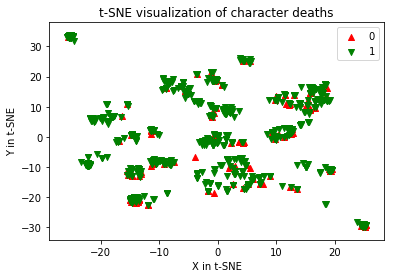

In [43]:
# scatter plot the sample points among 5 classes
import matplotlib.pyplot as plt
%matplotlib inline

marker_legend=('^', 'v')
color_legend = {0:'r', 1:'g', 2:'g'}
plt.figure()
for idx, cl in enumerate(np.unique(label_data)):
    plt.scatter(x=x_test_2d[label_data == cl, 0], y=x_test_2d[label_data == cl, 1], c=color_legend[idx], marker=marker_legend[idx], label=cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper right')
plt.title('t-SNE visualization of character deaths')
plt.show()